In [2]:
# Data from Nathan
hw_shoulder = [93.58974358974359, 5.128205128205128, 1.282051282051282]
rr_shoulder = [33.33333333333333, 43.75, 22.916666666666664]

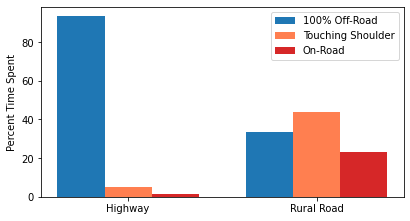

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Make bar numbers
bar_width = 0.25
x1 = np.arange(2)
x2 = [x + bar_width for x in x1]
x3 = [x + 2*bar_width for x in x1]

# Plot bars
ax.bar(x1, [hw_shoulder[0], rr_shoulder[0]], bar_width, label="100% Off-Road", color="tab:blue")
ax.bar(x2, [hw_shoulder[1], rr_shoulder[1]], bar_width, label="Touching Shoulder", color="coral")
ax.bar(x3, [hw_shoulder[2], rr_shoulder[2]], bar_width, label="On-Road", color="tab:red")

# Labels
ax.legend()
ax.set_xticks(x2)
ax.set_xticklabels(["Highway", "Rural Road"])
ax.set_ylabel("Percent Time Spent")
fig.set_size_inches(6.5,3.5)

In [4]:
# More data from Nathan, reformatted more betterer
hw_obstacles = {
    'Sign': {"see": 142, "touch": 15, "break": 1},
    'Post': {"see": 425, "touch": 169, "break": 23},
    'Mailbox': {"see": 0, "touch": 0, "break": 0},
    'Telephone Pole': {"see": 0, "touch": 0, "break": 0},
    'Cone': {"see": 24, "touch": 18, "break": 1},
    'Branches': {"see": 0, "touch": 0, "break": 0},
    'Drain': {"see": 4, "touch": 0, "break": 0},
    'Roadkill': {"see": 4, "touch": 0, "break": 0},
    'Guardrail': {"see": 2, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 1, "break": 0},
}

rr_obstacles = {
    'Sign': {"see": 838, "touch": 133, "break": 10},
    'Post': {"see": 271, "touch": 66, "break": 8},
    'Mailbox': {"see": 213, "touch": 0, "break": 1},
    'Telephone Pole': {"see": 47, "touch": 2, "break": 00},
    'Cone': {"see": 2, "touch": 0, "break": 0},
    'Branches': {"see": 29, "touch": 6, "break": 1},
    'Drain': {"see": 19, "touch": 0, "break": 0},
    'Roadkill': {"see": 6, "touch": 1, "break": 0},
    'Guardrail': {"see": 1, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 0, "break": 0},
}

In [5]:
ranklist = {}
for obs in hw_obstacles:
    ranklist[obs] = 0
    for t in hw_obstacles[obs]:
        ranklist[obs] += hw_obstacles[obs][t]
        ranklist[obs] += rr_obstacles[obs][t]

sorted(ranklist, key=lambda x: ranklist[x], reverse=True)

['Sign',
 'Post',
 'Mailbox',
 'Telephone Pole',
 'Cone',
 'Branches',
 'Drain',
 'Roadkill',
 'Guardrail',
 'Trash']

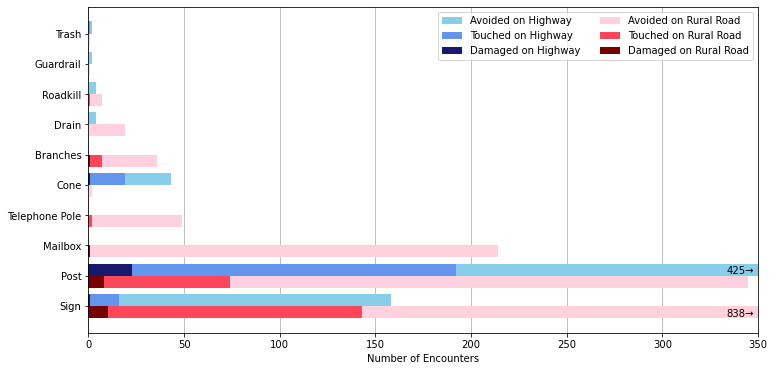

In [19]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
xx = np.arange(len(hw_obstacles))

bar_width = 0.4

# Bar heights
hw_see = [hw_obstacles[x]["see"] for x in hw_obstacles]
hw_touch = [hw_obstacles[x]["touch"] for x in hw_obstacles]
hw_break = [hw_obstacles[x]["break"] for x in hw_obstacles]

rr_see = [rr_obstacles[x]["see"] for x in rr_obstacles]
rr_touch = [rr_obstacles[x]["touch"] for x in rr_obstacles]
rr_break = [rr_obstacles[x]["break"] for x in rr_obstacles]

# Highway bars
ax.barh(xx+bar_width, hw_see, bar_width, left=[a+b for a,b in zip(hw_break, hw_touch)], label="Avoided on Highway", color="skyblue")
ax.barh(xx+bar_width, hw_touch, bar_width, left=hw_break, label="Touched on Highway", color="cornflowerblue")
ax.barh(xx+bar_width, hw_break, bar_width, label="Damaged on Highway", color="midnightblue")

# Rural bars
ax.barh(xx, rr_see, bar_width, left=[a+b for a,b in zip(rr_break, rr_touch)], label="Avoided on Rural Road", color="xkcd:light pink")
ax.barh(xx, rr_touch, bar_width, left=rr_break, label="Touched on Rural Road", color="xkcd:watermelon")
ax.barh(xx, rr_break, bar_width, label="Damaged on Rural Road", color="xkcd:blood")

# Labels
ax.set_yticks(xx+(bar_width/2))
ax.set_yticklabels(hw_obstacles.keys())
ax.legend(ncol=2)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid(visible=True, which="major", axis="x")
ax.set_axisbelow(True)
ax.set_xlabel("Number of Encounters")
ax.set_xlim(right=350)

# Annotations
ax.annotate(f"{rr_see[0]}→", (348, xx[0]-0.7*bar_width/2), ha="right")
ax.annotate(f"{hw_see[1]}→", (348, xx[1]+1.3*bar_width/2), ha="right")

fig.set_size_inches(12,6)